In [9]:
import pandas as pd

df = pd.read_excel('리뷰_디자이너패키지_정규화.xlsx')
df.head()

,product_id,product_name,sumR_label,counting,sum_logpoint,difficulty
0,M2184799,왕초보 식빵 수세미 뜨기,2635.0,4615.0,7351.155723,2.0
1,M2260245,코튼4 리얼 네트백,347.0,664.0,1016.482623,4.0
2,M3464759,코튼10 미니 스퀘어 가방,286.0,507.0,841.775168,1.0
3,NaN,하이소프트 수박바 에어팟 케이스,155.0,376.0,538.065448,3.0
4,M2260643,코튼4 네트 파우치 동영상 2개 분량,178.0,312.0,503.683038,4.0


In [26]:
df.describe()

,sumR_label,counting,sum_logpoint,difficulty
count,49.000000,49.000000,49.000000,47.000000
mean,97.632653,177.551020,279.908229,3.127660
std,377.095627,661.509671,1053.335754,0.923533
min,1.000000,5.000000,6.516943,1.000000
25%,5.000000,9.000000,13.515697,3.000000
50%,16.000000,30.000000,48.614945,3.000000
75%,40.000000,82.000000,126.287560,4.000000
max,2635.000000,4615.000000,7351.155723,5.000000


# 데이터 분포 확인

C:\Users\rkack\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rkack\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sum_logpoint'>

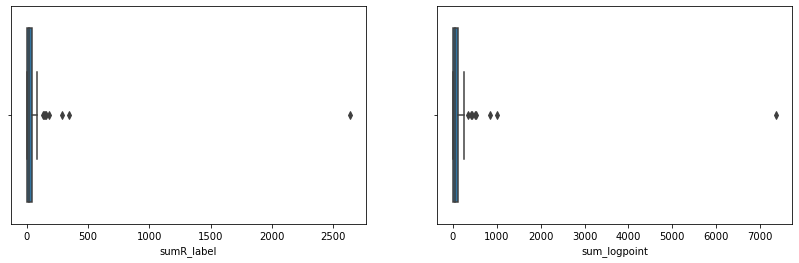

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
sns.boxplot(df['sumR_label'], ax=ax[0])
sns.boxplot(df['sum_logpoint'], ax=ax[1])

sumR_label과 sum_logpoint에서 가장 오른쪽에 위치한 이상치를 제거

In [28]:
# df의 첫 번째 행이 sumR_label과 sum_logpoint의 max 값을 가지고 있으므로 이상치를 제거하여 df2 생성
df2 = df[1:]
df2.head()

,product_id,product_name,sumR_label,counting,sum_logpoint,difficulty
1,M2260245,코튼4 리얼 네트백,347.0,664.0,1016.482623,4.0
2,M3464759,코튼10 미니 스퀘어 가방,286.0,507.0,841.775168,1.0
3,NaN,하이소프트 수박바 에어팟 케이스,155.0,376.0,538.065448,3.0
4,M2260643,코튼4 네트 파우치 동영상 2개 분량,178.0,312.0,503.683038,4.0
5,M2222822,하이소프트 왕눈이 괴물 에어팟 케이스,149.0,274.0,429.229314,3.0


# 이상치 제거 후 데이터 분포 확인

C:\Users\rkack\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rkack\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sum_logpoint'>

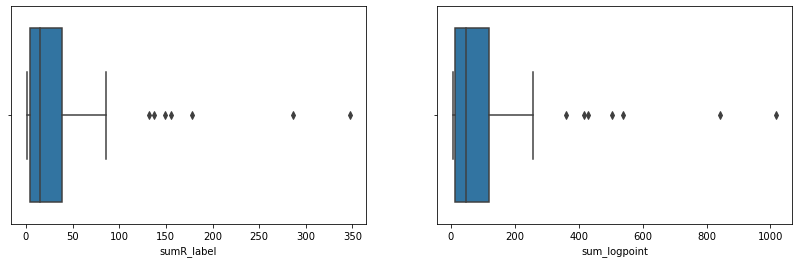

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
sns.boxplot(df2['sumR_label'], ax=ax[0])
sns.boxplot(df2['sum_logpoint'], ax=ax[1])

In [31]:
# sklearn.preprocessing을 통한 정규화
from sklearn.preprocessing import StandardScaler, RobustScaler
import pandas as pd

# sumR과 counting 열만 정규화
## Robust 정규화:
r_data=RobustScaler().fit_transform(df2[['sumR_label', 'sum_logpoint']]) 
# 정규화한 데이터
r_df = pd.DataFrame(r_data, columns=['norm_sumR', 'norm_logpoint'])
r_df.head()

,norm_sumR,norm_logpoint
0,9.822222,9.143302
1,8.014815,7.496094
2,4.133333,4.632603
3,4.814815,4.308432
4,3.955556,3.606454


In [32]:
## Standard 정규화
s_data=StandardScaler().fit_transform(df2[['sumR_label', 'sum_logpoint']]) 
# 정규화한 데이터
s_df = pd.DataFrame(s_data, columns=['norm_sumR', 'norm_logpoint'])
s_df.head()

,norm_sumR,norm_logpoint
0,4.160519,4.116959
1,3.320787,3.303213
2,1.517427,1.888605
3,1.834047,1.728460
4,1.434830,1.381673


# Robust 정규화 수행 vs. Standard 정규화 수행

C:\Users\rkack\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rkack\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='norm_sumR', ylabel='Density'>

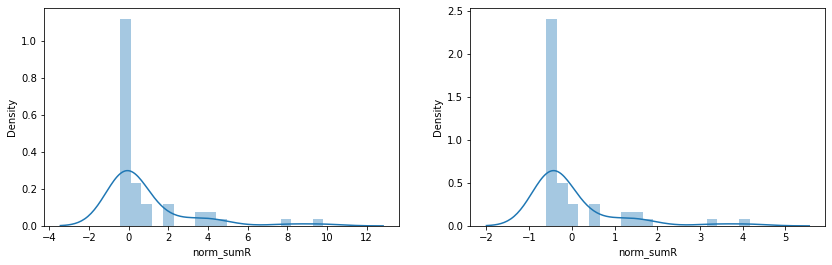

In [36]:
## Robust 정규화를 시행한 norm_sumR의 distplot과 Standard 정규화를 시행한 norm_sumR의 distplot

fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
sns.distplot(r_df['norm_sumR'], ax=ax[0]) # Robust 정규화 
sns.distplot(s_df['norm_sumR'], ax=ax[1]) # Standard 정규화

C:\Users\rkack\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rkack\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='norm_logpoint', ylabel='Density'>

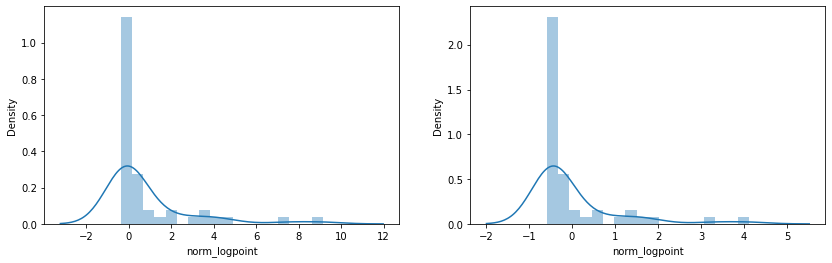

In [37]:
## Robust 정규화를 시행한 norm_logpoint의 distplot과 Standard 정규화를 시행한 norm_logpoint의 distplot

fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
sns.distplot(r_df['norm_logpoint'], ax=ax[0]) # Robust 정규화 
sns.distplot(s_df['norm_logpoint'], ax=ax[1]) # Standard 정규화

 Robust 정규화를 수행한 결과와 Standard 정규화를 수행한 결과에 큰 차이가 없기에 이상치에 강한 RobustScaler 사용함

In [42]:
result = pd.concat([df2[['product_id', 'product_name']],r_df, df2['difficulty']], axis=1)
result.head()

,product_id,product_name,norm_sumR,norm_logpoint,difficulty
1,M2260245,코튼4 리얼 네트백,8.014815,7.496094,4.0
2,M3464759,코튼10 미니 스퀘어 가방,4.133333,4.632603,1.0
3,NaN,하이소프트 수박바 에어팟 케이스,4.814815,4.308432,3.0
4,M2260643,코튼4 네트 파우치 동영상 2개 분량,3.955556,3.606454,4.0
5,M2222822,하이소프트 왕눈이 괴물 에어팟 케이스,3.451852,3.472832,3.0


In [43]:
result3 = result[result['difficulty']<=3]
result3.head()

,product_id,product_name,norm_sumR,norm_logpoint,difficulty
2,M3464759,코튼10 미니 스퀘어 가방,4.133333,4.632603,1.0
3,NaN,하이소프트 수박바 에어팟 케이스,4.814815,4.308432,3.0
5,M2222822,하이소프트 왕눈이 괴물 에어팟 케이스,3.451852,3.472832,3.0
6,M3381177,하이버블 계란후라이 수세미,3.600000,2.949483,2.0
7,M2263181,코바늘 마스터 세트 코바늘 뜨개질 입문자를 위한 모든 재료도안동영상 포함,2.088889,1.983682,3.0


In [41]:
result5 = result[(result['difficulty']>3)&(result['difficulty']<=5)]
result5.head()

,product_id,product_name,norm_sumR,norm_logpoint,difficulty
1,M2260245,코튼4 리얼 네트백,8.014815,7.496094,4.0
4,M2260643,코튼4 네트 파우치 동영상 2개 분량,3.955556,3.606454,4.0
13,M2165765,하이소프트 4ply LOVE 선인장,0.459259,0.353200,4.0
16,M2252537,돌핀 솔리드 돌핀 솔리드 가방\n,0.459259,0.310193,4.0
17,M10337573,코튼10 머메이드 백,0.370370,0.261542,4.0


In [46]:
# 두 집단의 평균에 대한 t검정
import pingouin as pg

pg.ttest(result3['norm_sumR'], result5['norm_sumR'], confidence=0.95) 
# H0: 두 집단(1~3점, 4~5점으로 분류된)의 제품 당 유의미한 리뷰의 수(카테고리 분류한 단어의 합)의 차이가 없다
# 난이도 분류에 따른 리뷰 내용 품질은 차이가 있다고 할 수 없다.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.455204,13.78751,two-sided,0.656048,"[-2.0, 1.3]",0.195639,0.352,0.087635


In [47]:
# 두 집단의 평균에 대한 t검정
import pingouin as pg

pg.ttest(result3['norm_logpoint'], result5['norm_logpoint'], confidence=0.95) 
# H0: 두 집단(1~3점, 4~5점으로 분류된)의 제품 당 유의미한 리뷰의 수(tf-idf)의 차이가 없다
# 난이도 분류에 따른 리뷰 내용 품질은 차이가 있다고 할 수 없다.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.394394,13.954575,two-sided,0.699252,"[-1.83, 1.26]",0.167644,0.345,0.077503
